In [1]:
import generator
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,LSTM,Bidirectional,Embedding,Conv2D,BatchNormalization,Activation
from tensorflow.keras.activations import tanh
from tensorflow.keras.models import Model
import numpy as np
import librosa
import matplotlib.pyplot as plt
import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
from IPython.display import display
from time import sleep

print('Test 1')
dh = display('Test2',display_id=True)
sleep(1)
dh.update('Test3')

Test 1


'Test3'

In [3]:
files , json,json_word = generator.gen()

In [4]:
maxi = 1021

In [5]:
#공식 구해야함
'''maxi = 0
for k,i in enumerate(files):
    wav,_ = librosa.load(files[i]['file_path'],sr=16000)
    mfcc = librosa.feature.mfcc(wav,n_mfcc=40)
    if mfcc.shape[1] > maxi:
        maxi = mfcc.shape[1]
    if k%200==0:
        print(k)'''
emb = Embedding(len(json),512)
emb_results = []
mfccs = tf.convert_to_tensor(np.ndarray((1,40,maxi,1)),dtype=tf.float32)
for k,i in enumerate(files):
    if k >= 30:
        break
    file_word_num = tf.cast([ json[i][0] for i in files[i]['file_txt']],tf.float32)
    wav,_ = librosa.load(files[i]['file_path'],sr=16000)
    emb_result = emb(file_word_num)
    emb_results.append(emb_result)
    mfcc = tf.cast(tf.expand_dims(
                tf.expand_dims(
                    librosa.feature.mfcc(wav,n_mfcc=40),axis=-1),axis=0),tf.float32)
    
    tak = tf.convert_to_tensor(np.zeros((1,40,maxi-mfcc.shape[-2],1)),dtype=tf.float32)
    print(tak.shape,mfcc.shape)
    mfcc = tf.concat([mfcc,tak],axis=2)
    mfccs = tf.concat([mfccs,mfcc],axis=0)

mfccs = mfccs[1:]
print(mfccs.shape)
'''

def module(x, lengths , module):
    
    for layer in module:
        x = layer(x)
        
        for length in lengths:
            '''

'''class tanh_layer(tf.keras.layers.Layer):
    def __init__(self):
        super(tanh_layer,self).__init__()
    
    def call(self,x):
        return tf.keras.activations.tanh(x)
'''
class tanh_layer(tf.keras.layers.Layer):
    
    def __init__(self,min_v,max_v):
        super(tanh_layer,self).__init__()
        self.min = tf.cast(min_v,tf.float32)
        self.max = tf.cast(max_v,tf.float32)
    
    def call(self,x):
        if x <= self.min:
            x = self.min
        elif x >= self.max:
            x = self.max
        else:
            x = x
            
        return x
    
maskconv = Sequential()
maskconv.add(Conv2D(32,(21,81),strides=(2,2),padding='valid',input_shape=(40,maxi,1)))
maskconv.add(BatchNormalization(-1))
maskconv.add(Activation('tanh'))
maskconv.add(Conv2D(32,(10,41),strides=(1,2),padding='valid'))
maskconv.add(BatchNormalization(-1))
maskconv.add(Activation('tanh'))

enc = Sequential()
enc.add(LSTM(256,input_shape=(32, 1)))

#enc.add(LSTM(128,input_shape=(40,1)))
#print(maskconv.summary())

result = maskconv(mfccs)
print(result.shape)
print(maskconv.summary())
result2 = enc(tf.squeeze(result)) 

(1, 40, 562, 1) (1, 40, 459, 1)
(1, 40, 581, 1) (1, 40, 440, 1)
(1, 40, 775, 1) (1, 40, 246, 1)
(1, 40, 666, 1) (1, 40, 355, 1)
(1, 40, 398, 1) (1, 40, 623, 1)
(1, 40, 654, 1) (1, 40, 367, 1)
(1, 40, 523, 1) (1, 40, 498, 1)
(1, 40, 799, 1) (1, 40, 222, 1)
(1, 40, 469, 1) (1, 40, 552, 1)
(1, 40, 506, 1) (1, 40, 515, 1)
(1, 40, 646, 1) (1, 40, 375, 1)
(1, 40, 508, 1) (1, 40, 513, 1)
(1, 40, 568, 1) (1, 40, 453, 1)
(1, 40, 535, 1) (1, 40, 486, 1)
(1, 40, 583, 1) (1, 40, 438, 1)
(1, 40, 823, 1) (1, 40, 198, 1)
(1, 40, 569, 1) (1, 40, 452, 1)
(1, 40, 757, 1) (1, 40, 264, 1)
(1, 40, 625, 1) (1, 40, 396, 1)
(1, 40, 537, 1) (1, 40, 484, 1)
(1, 40, 551, 1) (1, 40, 470, 1)
(1, 40, 728, 1) (1, 40, 293, 1)
(1, 40, 743, 1) (1, 40, 278, 1)
(1, 40, 613, 1) (1, 40, 408, 1)
(1, 40, 671, 1) (1, 40, 350, 1)
(1, 40, 643, 1) (1, 40, 378, 1)
(1, 40, 711, 1) (1, 40, 310, 1)
(1, 40, 754, 1) (1, 40, 267, 1)
(1, 40, 859, 1) (1, 40, 162, 1)
(1, 40, 887, 1) (1, 40, 134, 1)
(30, 40, 1021, 1)
(30, 1, 216, 32)
Model

In [6]:
result2

<tf.Tensor: shape=(30, 256), dtype=float32, numpy=
array([[-0.00257716, -0.00761488,  0.08561465, ..., -0.02992606,
        -0.01390109,  0.04843769],
       [-0.00257716, -0.00761487,  0.08561465, ..., -0.02992605,
        -0.01390109,  0.04843769],
       [-0.00257716, -0.00761488,  0.08561465, ..., -0.02992606,
        -0.01390109,  0.04843769],
       ...,
       [-0.00257716, -0.00761487,  0.08561464, ..., -0.02992606,
        -0.0139011 ,  0.04843769],
       [-0.00257716, -0.00761488,  0.08561465, ..., -0.02992606,
        -0.01390109,  0.04843769],
       [-0.00257716, -0.00761488,  0.08561464, ..., -0.02992606,
        -0.01390109,  0.0484377 ]], dtype=float32)>

In [7]:
max_len_txt = 0
for i in emb_results:
    if max_len_txt < i.shape[0]:
        max_len_txt = i.shape[0]
        
embs = tf.convert_to_tensor(np.zeros((1,max_len_txt,512)),dtype=tf.float32)
for i in emb_results:
    emb = tf.convert_to_tensor(np.zeros((max_len_txt-(i.shape[0]),512)),dtype=tf.float32)
    padded_emb = tf.expand_dims(tf.concat([i,emb],axis=0),axis=0)
    embs = tf.concat([embs,padded_emb],axis=0)
embs = embs[1:]
print(embs.shape)

(30, 62, 512)


In [8]:
tf.expand_dims(tf.concat([tf.tile(tf.expand_dims(result2,axis=1),[1,embs.shape[1],1]),embs],axis=2),axis=-1)

<tf.Tensor: shape=(30, 62, 768, 1), dtype=float32, numpy=
array([[[[-0.00257716],
         [-0.00761488],
         [ 0.08561465],
         ...,
         [ 0.03203825],
         [-0.04124198],
         [-0.01413228]],

        [[-0.00257716],
         [-0.00761488],
         [ 0.08561465],
         ...,
         [-0.03354591],
         [ 0.01908563],
         [ 0.03475929]],

        [[-0.00257716],
         [-0.00761488],
         [ 0.08561465],
         ...,
         [-0.03210628],
         [ 0.01520649],
         [ 0.00223973]],

        ...,

        [[-0.00257716],
         [-0.00761488],
         [ 0.08561465],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[-0.00257716],
         [-0.00761488],
         [ 0.08561465],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[-0.00257716],
         [-0.00761488],
         [ 0.08561465],
         ...,
         [ 0.        ],
         [ 0.     

In [9]:
dec = Sequential()
dec.add(LSTM(512,input_shape=(62,768),return_sequences=True))
print(result2.shape)
print(emb_results)

dec(tf.concat([tf.tile(tf.expand_dims(result2,axis=1),[1,embs.shape[1],1]),embs],axis=2))

(30, 256)
[<tf.Tensor: shape=(42, 512), dtype=float32, numpy=
array([[ 0.01752198,  0.00022636,  0.03933001, ...,  0.03203825,
        -0.04124198, -0.01413228],
       [-0.00550729, -0.01194663,  0.02978185, ..., -0.03354591,
         0.01908563,  0.03475929],
       [-0.01054085,  0.03463899,  0.04583019, ..., -0.03210628,
         0.01520649,  0.00223973],
       ...,
       [ 0.04534575,  0.01565632, -0.03169231, ..., -0.03819252,
         0.04272776, -0.01427759],
       [-0.00918976,  0.04319819, -0.00101652, ...,  0.04569241,
         0.01053451, -0.04402941],
       [ 0.00308665,  0.00191076,  0.01840368, ...,  0.00958807,
         0.04504105, -0.03974609]], dtype=float32)>, <tf.Tensor: shape=(39, 512), dtype=float32, numpy=
array([[ 0.01752198,  0.00022636,  0.03933001, ...,  0.03203825,
        -0.04124198, -0.01413228],
       [ 0.01406124, -0.04688461,  0.00185901, ..., -0.0004834 ,
         0.00252807,  0.01928493],
       [ 0.0069105 ,  0.03691398,  0.00348139, ..., -0.00

<tf.Tensor: shape=(30, 62, 512), dtype=float32, numpy=
array([[[ 0.00066301, -0.00862673,  0.00218778, ..., -0.00505968,
         -0.0020188 ,  0.00178919],
        [-0.00099684, -0.02107097, -0.00212538, ..., -0.0072173 ,
          0.00274228, -0.00087199],
        [ 0.00050671, -0.0194467 , -0.00736043, ..., -0.01344863,
          0.01285753, -0.00137245],
        ...,
        [ 0.00019752, -0.03641215, -0.0039332 , ..., -0.01532715,
         -0.00174355,  0.00236357],
        [ 0.00020975, -0.03636305, -0.00392791, ..., -0.01534751,
         -0.00174653,  0.00232971],
        [ 0.00021918, -0.03631888, -0.00392904, ..., -0.01536299,
         -0.00175309,  0.00230384]],

       [[ 0.00066302, -0.00862673,  0.00218778, ..., -0.00505968,
         -0.0020188 ,  0.00178919],
        [ 0.0022964 , -0.01475509, -0.00354794, ..., -0.00516714,
          0.00049132,  0.00169551],
        [ 0.01381624, -0.02648242, -0.00441203, ..., -0.00980361,
          0.000901  , -0.00127789],
        ...,

In [ ]:
max_len_txt = 0
for i in emb_results:
    if max_len_txt < i.shape[0]:
        max_len_txt = i.shape[0]
        
embs = tf.convert_to_tensor(np.zeros((1,max_len_txt,512)),dtype=tf.float32)
for i in emb_results:
    emb = tf.convert_to_tensor(np.zeros((max_len_txt-(i.shape[0]),512)),dtype=tf.float32)
    padded_emb = tf.expand_dims(tf.concat([i,emb],axis=0),axis=0)
    embs = tf.concat([embs,padded_emb],axis=0)
embs = embs[1:]
print(embs.shape)

dec = Sequential()
dec.add(LSTM(512,input_shape=(62,768),return_sequences=True))
print(result2.shape)
print(emb_results)

dec(tf.concat([tf.tile(tf.expand_dims(result2,axis=1),[1,embs.shape[1],1]),embs],axis=2))

In [35]:
result

<tf.Tensor: shape=(30, 94, 512), dtype=float32, numpy=
array([[[-3.52782803e-03, -3.93582508e-03,  2.33765994e-03, ...,
         -5.28289890e-03, -5.90641377e-03,  2.69050663e-03],
        [-3.47828656e-03, -2.92383484e-03,  3.21246730e-03, ...,
         -2.12687603e-03, -1.13762468e-02, -1.11254603e-02],
        [-2.80162320e-03,  2.70258682e-03,  7.79751863e-05, ...,
         -3.37944715e-03, -8.15567467e-03, -2.15686280e-02],
        ...,
        [-5.28136780e-03, -1.79182750e-03, -3.13398149e-03, ...,
         -1.41421740e-03, -1.76067743e-02, -1.50328400e-02],
        [-5.28136780e-03, -1.79182610e-03, -3.13397893e-03, ...,
         -1.41421682e-03, -1.76067743e-02, -1.50328362e-02],
        [-5.28136780e-03, -1.79182435e-03, -3.13397706e-03, ...,
         -1.41421659e-03, -1.76067743e-02, -1.50328325e-02]],

       [[-3.52782803e-03, -3.93582555e-03,  2.33766017e-03, ...,
         -5.28289890e-03, -5.90641424e-03,  2.69050710e-03],
        [-3.58268968e-03, -4.22862265e-03, -2.48

In [66]:
mat = tf.nn.l2_normalize(result,2)

mat2 = tf.nn.l2_normalize(tf.transpose(batch_emb,[0,2,1]),2)

similar = tf.matmul(mat[:,:],mat2[:,:])

In [45]:
similar.shape

TensorShape([30, 94, 94])

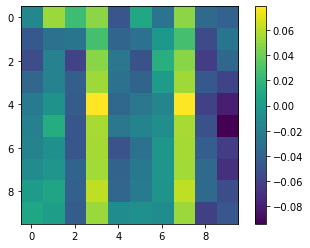

In [71]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(similar[:10,:10])
plt.colorbar()
plt.show()

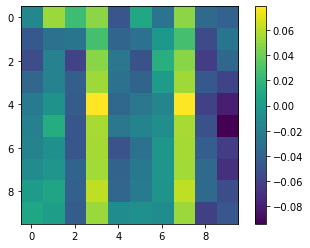

In [75]:
mat = tf.nn.l2_normalize(result,2)
mat2 = tf.nn.l2_normalize(tf.transpose(batch_emb,[0,2,1]),1)

similar = tf.matmul(mat[:,:],mat2[:,:])
plt.imshow(similar[0,:10,:10])
plt.colorbar()
plt.show()

In [70]:
similar = tf.matmul(mat,mat2)
print(similar[:10])

tf.Tensor(
[[-0.01409065  0.05273163  0.02503201  0.04914794 -0.04755472  0.00932222
  -0.0284523   0.04914794 -0.03453746 -0.03941767  0.00818208  0.02374085
   0.01704878  0.02194285  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        

In [82]:
def cosine_similarity_3d(matrix, vector):
    ''' Computes cosine similarity of a given vector with vector rows from matrix'''

    # normalize input
    mat = tf.nn.l2_normalize(matrix,2)
    mat2 = tf.nn.l2_normalize(tf.transpose(vector,[0,2,1]),1)

    # multiply row i with row j using transpose
    similar = tf.matmul(mat[:,:],mat2[:,:])

    return similar

def const_loss(result):
    mom = 0
    t = 0.07
    losses = tf.convert_to_tensor(np.ndarray((1,1)),dtype=tf.float32)
    for i,dim in enumerate(result):
        if i==0:
            prev_dim = dim
            continue
        #child = tf.math.exp(pl.cosine_similarity(tf.expand_dims(dim,axis=0),tf.expand_dims(prev_dim,axis=0))/t)
        #child = tf.math.exp(calc_euclidian_dists(tf.expand_dims(dim,axis=0),tf.expand_dims(prev_dim,axis=0))/t)
        child = tf.math.exp(cosine_similarity_3d(tf.expand_dims(dim,axis=0),tf.expand_dims(prev_dim,axis=0))/t)
        mom = mom + child
        prev_dim = dim
        loss = -tf.math.log(child/mom)
        losses = tf.concat([losses,loss],axis=1)
    #return tf.reduce_mean(losses)
    return tf.reduce_mean(losses,axis=1)

In [328]:
twav,_ = librosa.load('../test.wav',sr=16000)

In [329]:
import IPython.display as lpd
lpd.Audio(twav,rate=16000)

In [324]:
files

{'1673-143396-0000': {'file_path': '/root/storage/DATA/LibriSpeech/dev-clean/1673/143396/1673-143396-0000.wav',
  'file_txt': ['<sos>',
   'a',
   'laudable',
   'regard',
   'for',
   'the',
   'honor',
   'of',
   'the',
   'first',
   'proselyte',
   'has',
   'countenanced',
   'the',
   'belief',
   'the',
   'hope',
   'the',
   'wish',
   'that',
   'the',
   'ebionites',
   'or',
   'at',
   'least',
   'the',
   'nazarenes',
   'were',
   'distinguished',
   'only',
   'by',
   'their',
   'obstinate',
   'perseverance',
   'in',
   'the',
   'practice',
   'of',
   'the',
   'mosaic',
   'rites',
   '<eos>']},
 '1673-143396-0001': {'file_path': '/root/storage/DATA/LibriSpeech/dev-clean/1673/143396/1673-143396-0001.wav',
  'file_txt': ['<sos>',
   'their',
   'churches',
   'have',
   'disappeared',
   'their',
   'books',
   'are',
   'obliterated',
   'their',
   'obscure',
   'freedom',
   'might',
   'allow',
   'a',
   'latitude',
   'of',
   'faith',
   'and',
   'the',


In [10]:
class encoder(Model):
    def conv_init(self):
        conv = Sequential([
            Conv2D(32,(21,81),strides=(2,2),padding='valid',input_shape=(40,1021,1)),
            BatchNormalization(-1),
            Activation('tanh'),
            Conv2D(32,(10,41),strides=(1,2),padding='valid'),
            BatchNormalization(-1),
            Activation('tanh')
        ])
        
        return conv
    
    def __init__(self):
        super(encoder,self).__init__()
        self.conv = self.conv_init()
        self.rnn = Sequential(
            LSTM(256,input_shape=(32,1))
        )
        
    def call(self,audio):
        x = self.conv(audio)
        x = self.rnn(tf.squeeze(x))
        
        return x
        
class seq2(Model):
    def __init__(self, enc, dec):
        super(seq2,self).__init__()
        self.enc = enc
        self.dec = dec
        
    def call(self,audio, txt_emb):
        enc_out = enc(audio)
        dec_out = dec(enc_out,txt_emb)
        
        return dec_out
    
    def predict(self, audio):
        enc_out = enc(audio)
        

class decoder(Model):
    def __init__(self):
        super(decoder,self).__init__()
        self.rnn = Sequential(
            LSTM(512,input_shape=(94,768),return_sequences=True)
        )
    
    def call(self,enc_out,embs):
        
        tiled = tf.tile(tf.expand_dims(enc_out,axis=1),[1,embs.shape[1],1])
        cat = tf.concat([tiled,embs],axis=2)
        result = self.rnn(cat)
        
        return result
    
    '''def predict(self, enc_out):
     '''   
        


In [11]:
#공식 구해야함
'''
maxi = 0
for k,i in enumerate(files):
    wav,_ = librosa.load(files[i]['file_path'],sr=16000)
    mfcc = librosa.feature.mfcc(wav,n_mfcc=40)
    if mfcc.shape[1] > maxi:
        maxi = mfcc.shape[1]
    if k%200==0:
        print(k)
'''
iteration = 100
enc = encoder()
dec = decoder()
model = seq2(enc,dec)

emb_layer = Embedding(len(json),512)
opt = tf.keras.optimizers.Adam(10e-3)
maxi = 1021

#전체 파일 생성
for k,i in enumerate(files):
    file_word_num = tf.cast([ json[i][0] for i in files[i]['file_txt']],tf.float32)
    wav,_ = librosa.load(files[i]['file_path'],sr=16000)
    emb_result = emb_layer(file_word_num)
    emb_results.append(emb_result)
    mfcc = tf.cast(tf.expand_dims(
                tf.expand_dims(
                    librosa.feature.mfcc(wav,n_mfcc=40),axis=-1),axis=0),tf.float32)

    tak = tf.convert_to_tensor(np.zeros((1,40,maxi-mfcc.shape[-2],1)),dtype=tf.float32)
    mfcc = tf.concat([mfcc,tak],axis=2)
    mfccs = tf.concat([mfccs,mfcc],axis=0)

max_len_txt = 0
for i in emb_results:
    if max_len_txt < i.shape[0]:
        max_len_txt = i.shape[0]

embs = tf.convert_to_tensor(np.zeros((1,max_len_txt,512)),dtype=tf.float32)
for i in emb_results:
    emb = tf.convert_to_tensor(np.zeros((max_len_txt-(i.shape[0]),512)),dtype=tf.float32)
    padded_emb = tf.expand_dims(tf.concat([i,emb],axis=0),axis=0)
    embs = tf.concat([embs,padded_emb],axis=0)
embs = embs[1:]

train_mfccs = mfccs[:-270]    
test_mfccs = mfccs[-270:]

train_embs = embs[:-270]    
test_embs = embs[-270:]


In [387]:
res = enc(batch_mfcc)
print(dec(res,batch_emb))
print(enc.trainable_variables)

tf.Tensor(
[[[ 1.5733584e-03 -5.8145304e-03  7.3968801e-03 ...  8.7954925e-04
   -5.4948189e-04  8.7955013e-05]
  [-2.0118195e-03 -1.1095108e-02  1.6948570e-02 ... -5.5208331e-04
   -4.0561580e-03  9.5172590e-03]
  [ 1.3985699e-03 -8.5309893e-03  9.7809555e-03 ... -3.0678671e-03
   -8.9805974e-03  2.6841194e-03]
  ...
  [-7.9341698e-04  1.6440043e-03  3.7839226e-04 ... -2.4871174e-03
   -1.3598034e-03  1.1051019e-03]
  [-7.9358910e-04  1.6435459e-03  3.7879881e-04 ... -2.4875375e-03
   -1.3597847e-03  1.1054627e-03]
  [-7.9373352e-04  1.6431623e-03  3.7916002e-04 ... -2.4879002e-03
   -1.3597640e-03  1.1057666e-03]]

 [[ 1.5733584e-03 -5.8145304e-03  7.3968801e-03 ...  8.7954925e-04
   -5.4948177e-04  8.7954548e-05]
  [ 7.7388785e-03  3.0489664e-03  4.9077917e-04 ... -1.6707886e-03
    1.3980620e-02 -1.2220648e-03]
  [ 5.0477730e-04 -4.8566377e-03  1.8483751e-04 ... -3.1098824e-03
    1.1533286e-02 -3.6694398e-03]
  ...
  [-7.9435302e-04  1.6421509e-03  3.8023613e-04 ... -2.4897675e-03

In [22]:
def calc_euclidean(y,y_hat):
    '''n = y_hat.shape[0]
    m = y.shape[0]
    x = tf.tile(tf.expand_dims(y_hat, 1), [1, m, 1])
    y = tf.tile(tf.expand_dims(y, 0), [n, 1, 1])'''
    return tf.reduce_mean(tf.math.pow(y - y_hat, 2), 1)

In [23]:
calc_euclidean(result[0],batch_emb[0])

<tf.Tensor: shape=(94,), dtype=float32, numpy=
array([0.00281128, 0.00609807, 0.00946626, 0.01286105, 0.01601833,
       0.01770519, 0.01919816, 0.02042105, 0.02176894, 0.02181988,
       0.02276224, 0.02365939, 0.02414105, 0.02455851, 0.02521872,
       0.02506955, 0.02560618, 0.02538266, 0.02470997, 0.02468345,
       0.02560372, 0.02532528, 0.02529808, 0.02615838, 0.02490083,
       0.02563072, 0.02483926, 0.02552504, 0.02517629, 0.0251143 ,
       0.02647851, 0.02470984, 0.02505225, 0.02460022, 0.02560126,
       0.02573476, 0.02543053, 0.02526605, 0.02574016, 0.02461426,
       0.0247201 , 0.02635584, 0.02442107, 0.02442769, 0.02443482,
       0.02444161, 0.02444777, 0.02445318, 0.02445783, 0.02446175,
       0.02446502, 0.02446769, 0.02446985, 0.02447157, 0.02447293,
       0.02447398, 0.02447479, 0.02447539, 0.02447584, 0.02447615,
       0.02447637, 0.02447652, 0.02447661, 0.02447665, 0.02447667,
       0.02447667, 0.02447665, 0.02447663, 0.0244766 , 0.02447656,
       0.024476

In [21]:
batch_emb[0].shape

TensorShape([94, 512])

In [407]:
enc = encoder()
dec = decoder()
model = seq2(enc,dec)
opt = tf.keras.optimizers.Adam(10e-10)
#train

train_loss = tf.keras.metrics.Mean(name='train_loss')
df = display('start',display_id=True)

with tf.device(f'GPU:{0}'):
    for iter_num in range(100):
        for i in range(train_embs.shape[0]//30):
            batch_emb = train_embs[i*30:(i+1)*30]
            batch_mfcc = train_mfccs[i*30:(i+1)*30]
            with tf.GradientTape() as tape:
                
                result = model(batch_mfcc,batch_emb)
                print(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2))[0])
                print(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2))[0])
                loss=tf.reduce_mean(tf.reduce_mean(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2)),1))
                train_loss(loss)
            grad = tape.gradient(loss,model.trainable_weights)
            
            #print('result : ',result[0,0,:10],result.shape)
            #print('grad : ',grad[0][0][0,0,:10])
            #print('weights : ',model.trainable_weights[0][0][0,0,:10])
            
            opt.apply_gradients(zip(grad,model.trainable_weights))
            #print('after weights : ',model.trainable_weights[0][0][0,0,:10])
            #print('\n\n')
        print(train_loss.result().numpy())
        df.update(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2))[0])

<tf.Tensor: shape=(94,), dtype=float32, numpy=
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32)>

tf.Tensor(
[0.6485367  0.6984941  0.67456985 0.67238784 0.6800409  0.6905051
 0.6745163  0.6842493  0.6984813  0.67294776 0.6949135  0.6606094
 0.6776725  0.6979115  0.6777487  0.7072678  0.7084948  0.7187062
 0.6824706  0.6657243  0.71453583 0.6886743  0.6520744  0.66852826
 0.6922919  0.7033684  0.70177406 0.6794292  0.6843187  0.66203755
 0.6664911  0.67834604 0.6778632  0.6792591  0.67835146 0.7140962
 0.69449735 0.6964867  0.714045   0.67829657 0.6731466  0.6997393
 0.14858802 0.12384669 0.10635046 0.09373304 0.08450922 0.07771366
 0.07269134 0.06897917 0.06623949 0.06422175 0.06273879 0.06165075
 0.06085355 0.06027007 0.05984339 0.05953164 0.05930407 0.05913816
 0.05901741 0.05892972 0.05886622 0.05882043 0.05878758 0.05876419
 0.05874769 0.0587362  0.05872834 0.05872311 0.05871975 0.05871774
 0.05871666 0.05871624 0.05871627 0.05871658 0.05871708 0.05871768
 0.05871833 0.05871899 0.05871964 0.05872025 0.05872081 0.05872133
 0.0587218  0.05872221 0.05872257 0.05872289 0.05872316 

tf.Tensor(
[0.6735036  0.66587615 0.683397   0.70380986 0.71236235 0.67153525
 0.6988955  0.73698896 0.71553123 0.71474195 0.6963287  0.67833173
 0.6991642  0.74554145 0.6992736  0.7144719  0.65549433 0.72754246
 0.75238305 0.72601104 0.7474571  0.6991803  0.7187767  0.7084197
 0.7457479  0.6643277  0.7210563  0.71105045 0.7267912  0.70667845
 0.7464504  0.2656891  0.25541893 0.2491897  0.24526249 0.24270207
 0.2409859  0.23980916 0.23898646 0.2384011  0.2379776  0.23766603
 0.23743287 0.23725538 0.23711792 0.2370097  0.23692317 0.23685302
 0.23679547 0.23674779 0.23670802 0.23667465 0.23664658 0.23662293
 0.23660302 0.2365863  0.23657228 0.23656058 0.23655088 0.23654287
 0.23653631 0.23653096 0.23652665 0.23652321 0.2365205  0.23651837
 0.23651674 0.2365155  0.23651458 0.23651393 0.23651347 0.23651314
 0.23651294 0.23651284 0.23651281 0.23651281 0.23651284 0.2365129
 0.23651296 0.23651303 0.2365131  0.23651318 0.23651324 0.23651329
 0.23651335 0.23651339 0.23651344 0.23651347 0.236513

tf.Tensor(
[0.6773045  0.65431845 0.6812329  0.6980198  0.71391726 0.72744435
 0.696171   0.68949866 0.6902838  0.7030851  0.72216433 0.7204568
 0.72780776 0.7139394  0.70013404 0.7064436  0.72102815 0.71782446
 0.707089   0.7059147  0.7515099  0.71749127 0.7204463  0.7293388
 0.7442979  0.6996453  0.70755684 0.71833754 0.71158993 0.7471903
 0.7049537  0.69688386 0.73297715 0.72860855 0.28250238 0.27366623
 0.26841226 0.26507762 0.26282325 0.26121178 0.26000533 0.25906846
 0.2583206  0.25771162 0.25720888 0.25679025 0.2564399  0.25614607
 0.2558997  0.25569338 0.25552106 0.25537762 0.2552587  0.25516054
 0.25507987 0.25501388 0.25496018 0.25491667 0.2548816  0.25485346
 0.254831   0.2548131  0.25479895 0.2547878  0.25477904 0.2547722
 0.25476682 0.25476262 0.25475934 0.2547568  0.25475478 0.25475323
 0.25475198 0.254751   0.2547502  0.25474954 0.254749   0.25474858
 0.2547482  0.2547479  0.2547476  0.2547474  0.25474718 0.25474697
 0.25474682 0.25474668 0.25474656 0.25474644 0.25474635

tf.Tensor(
[6.72620952e-01 6.62630796e-01 6.90958917e-01 6.75815344e-01
 6.81977928e-01 6.72198415e-01 6.91351295e-01 6.88706398e-01
 6.65694654e-01 7.11222649e-01 6.76084220e-01 6.62487984e-01
 6.96485579e-01 6.91928148e-01 6.61764860e-01 6.75501525e-01
 6.59517765e-01 6.52091920e-01 6.69998407e-01 6.92140698e-01
 6.86107635e-01 1.27658993e-01 1.00047804e-01 7.96303973e-02
 6.41297325e-02 5.21079078e-02 4.26280163e-02 3.50570157e-02
 2.89514028e-02 2.39901692e-02 1.99345630e-02 1.66031104e-02
 1.38555039e-02 1.15817869e-02 9.69487149e-03 8.12516641e-03
 6.81665260e-03 5.72394859e-03 4.81008925e-03 4.04482428e-03
 3.40328994e-03 2.86497944e-03 2.41292361e-03 2.03304249e-03
 1.71362550e-03 1.44491368e-03 1.21875899e-03 1.02834892e-03
 8.67980183e-04 7.32872461e-04 6.19015540e-04 5.23042516e-04
 4.42124496e-04 3.73883202e-04 3.16318299e-04 2.67746596e-04
 2.26751290e-04 1.92139516e-04 1.62906872e-04 1.38207441e-04
 1.17328898e-04 9.96714007e-05 8.47298506e-05 7.20790413e-05
 6.13610246e-

tf.Tensor(
[6.72620893e-01 6.52907312e-01 6.61815047e-01 6.78477585e-01
 6.71536744e-01 6.60362959e-01 6.73535824e-01 6.57634556e-01
 6.65385306e-01 6.70132339e-01 6.89114809e-01 6.86109543e-01
 1.21533915e-01 9.55503285e-02 7.64061138e-02 6.18663058e-02
 5.05498610e-02 4.15763706e-02 3.43622640e-02 2.85042711e-02
 2.37124991e-02 1.97713785e-02 1.65162124e-02 1.38185639e-02
 1.15767634e-02 9.70944390e-03 8.15096404e-03 6.84802933e-03
 5.75715536e-03 4.84269904e-03 4.07533301e-03 3.43083963e-03
 2.88915355e-03 2.43360433e-03 2.05030548e-03 1.72766508e-03
 1.45599002e-03 1.22716231e-03 1.03437586e-03 8.71918863e-04
 7.34994945e-04 6.19573635e-04 5.22266550e-04 4.40223666e-04
 3.71046946e-04 3.12717806e-04 2.63536145e-04 2.22069706e-04
 1.87111247e-04 1.57642862e-04 1.32805886e-04 1.11875815e-04
 9.42411571e-05 7.93856962e-05 6.68736029e-05 5.63369358e-05
 4.74650478e-05 3.99957244e-05 3.37076890e-05 2.84142716e-05
 2.39580550e-05 2.02063475e-05 1.70473613e-05 1.43869574e-05
 1.21459097e-

tf.Tensor(
[6.7262089e-01 6.8776286e-01 6.5177900e-01 6.5368122e-01 6.8343389e-01
 6.5996194e-01 6.9665956e-01 6.5740192e-01 6.6883218e-01 6.8826693e-01
 1.1916151e-01 9.3980022e-02 7.5418800e-02 6.1298028e-02 5.0279532e-02
 4.1516200e-02 3.4449272e-02 2.8693324e-02 2.3971047e-02 2.0075722e-02
 1.6848905e-02 1.4166660e-02 1.1930586e-02 1.0061746e-02 8.4963189e-03
 7.1824011e-03 6.0775867e-03 5.1470906e-03 4.3622749e-03 3.6994871e-03
 3.1391298e-03 2.6649167e-03 2.2632740e-03 1.9228583e-03 1.6341656e-03
 1.3892152e-03 1.1812914e-03 1.0047321e-03 8.5475750e-04 7.2732661e-04
 6.1901996e-04 5.2694220e-04 4.4863980e-04 3.8203335e-04 3.2535987e-04
 2.7712446e-04 2.3605932e-04 2.0108916e-04 1.7130184e-04 1.4592342e-04
 1.2429702e-04 1.0586499e-04 9.0153662e-05 7.6760509e-05 6.5343280e-05
 5.5610806e-05 4.7315189e-05 4.0245275e-05 3.4221099e-05 2.9089182e-05
 2.4718584e-05 2.0997533e-05 1.7830616e-05 1.5136350e-05 1.2845144e-05
 1.0897571e-05 9.2428900e-06 7.8377825e-06 6.6452808e-06 5.6338567

tf.Tensor(
[0.72081834 0.76053286 0.872668   0.92883766 1.0009749  1.0608364
 1.0976822  1.1205803  1.140867   1.1265812  1.1147276  1.1205369
 1.1303247  1.136097   1.1535381  1.2038677  1.1702473  1.1806512
 1.1835363  1.152275   1.2132876  1.2028952  1.1623207  1.1979151
 1.1767467  1.2242687  1.1590416  1.2331969  1.1761991  1.2105927
 1.2045863  1.1742059  1.1739602  1.1620145  1.2255071  1.2380183
 1.2435861  1.0035242  0.9988945  0.99617887 0.9945827  0.99365765
 0.9931409  0.99287426 0.9927605  0.99273926 0.9927725  0.9928365
 0.99291587 0.9930016  0.99308753 0.99317044 0.99324834 0.9933201
 0.99338543 0.9934442  0.9934968  0.99354327 0.99358433 0.9936203
 0.9936515  0.9936786  0.993702   0.9937221  0.99373925 0.9937538
 0.9937661  0.99377644 0.9937851  0.9937923  0.99379814 0.993803
 0.99380696 0.9938102  0.99381274 0.9938147  0.9938163  0.99381757
 0.99381846 0.99381924 0.9938197  0.9938201  0.99382037 0.9938205
 0.9938206  0.99382067 0.9938206  0.9938206  0.99382055 0.993820

tf.Tensor(
[6.7262083e-01 6.5501958e-01 6.6175717e-01 6.7571414e-01 6.6804069e-01
 6.7656511e-01 6.5367901e-01 6.9423169e-01 6.8511105e-01 6.8980527e-01
 6.6903287e-01 6.6934067e-01 6.8327892e-01 6.8445247e-01 6.7839664e-01
 6.8726385e-01 1.1657703e-01 9.2161648e-02 7.4026376e-02 6.0165189e-02
 4.9329326e-02 4.0711470e-02 3.3767659e-02 2.8116729e-02 2.3482341e-02
 1.9658482e-02 1.6488088e-02 1.3849250e-02 1.1645951e-02 9.8016681e-03
 8.2547888e-03 6.9552897e-03 5.8622556e-03 4.9420171e-03 4.1667167e-03
 3.5132032e-03 2.9621627e-03 2.4974346e-03 2.1054614e-03 1.7748480e-03
 1.4960008e-03 1.2608353e-03 1.0625327e-03 8.9533773e-04 7.5439253e-04
 6.3559518e-04 5.3548149e-04 4.5112678e-04 3.8006113e-04 3.2019962e-04
 2.6978212e-04 2.2732319e-04 1.9156949e-04 1.6146363e-04 1.3611383e-04
 1.1476830e-04 9.6793294e-05 8.1654929e-05 6.8903479e-05 5.8160327e-05
 4.9106831e-05 4.1474897e-05 3.5039055e-05 2.9609748e-05 2.5027637e-05
 2.1158823e-05 1.7890799e-05 1.5129035e-05 1.2794105e-05 1.0819266

tf.Tensor(
[6.72620773e-01 6.37024760e-01 6.81409001e-01 6.68012500e-01
 6.75362408e-01 6.73243344e-01 6.44338310e-01 6.81857288e-01
 6.82314754e-01 6.52562976e-01 6.60257161e-01 6.65956199e-01
 6.73989356e-01 6.80302083e-01 6.35910869e-01 6.67441964e-01
 6.79302871e-01 6.69464111e-01 6.65268004e-01 6.77299917e-01
 7.06778169e-01 6.87635899e-01 1.26425400e-01 1.00370735e-01
 8.08077529e-02 6.57171384e-02 5.38363755e-02 4.43439968e-02
 3.66805270e-02 3.04475874e-02 2.53504254e-02 2.11643111e-02
 1.77141391e-02 1.48614291e-02 1.24956025e-02 1.05278166e-02
 8.88641365e-03 7.51343649e-03 6.36190455e-03 5.39365038e-03
 4.57759108e-03 3.88833741e-03 3.30508524e-03 2.81072292e-03
 2.39112228e-03 2.03457125e-03 1.73132098e-03 1.47322554e-03
 1.25345320e-03 1.06625457e-03 9.06776986e-04 7.70912739e-04
 6.55177224e-04 5.56608196e-04 4.72683401e-04 4.01252531e-04
 3.40480387e-04 2.88799638e-04 2.44871015e-04 2.07550038e-04
 1.75858382e-04 1.48960098e-04 1.26141007e-04 1.06791289e-04
 9.03905238e-

tf.Tensor(
[6.72620773e-01 6.76948011e-01 6.80817902e-01 6.46070004e-01
 6.67598188e-01 6.56317055e-01 6.56074584e-01 6.71669483e-01
 6.54188573e-01 6.49203420e-01 6.85562849e-01 6.57072783e-01
 6.65751874e-01 6.86903059e-01 6.96948588e-01 6.80267394e-01
 7.05788136e-01 6.85683727e-01 6.91410244e-01 1.37739703e-01
 1.10132307e-01 8.93567652e-02 7.32797608e-02 6.05598278e-02
 5.03245145e-02 4.19842340e-02 3.51248570e-02 2.94449124e-02
 2.47180276e-02 2.07698252e-02 1.74631793e-02 1.46884946e-02
 1.23570459e-02 1.03962673e-02 8.74632411e-03 7.35755917e-03
 6.18855003e-03 5.20460447e-03 4.37657954e-03 3.67994141e-03
 3.09400726e-03 2.60132505e-03 2.18716520e-03 1.83909456e-03
 1.54662400e-03 1.30090665e-03 1.09448633e-03 9.21083323e-04
 7.75411725e-04 6.53025403e-04 5.50186844e-04 4.63755860e-04
 3.91095411e-04 3.29992035e-04 2.78588297e-04 2.35326152e-04
 1.98898866e-04 1.68210740e-04 1.42343095e-04 1.20525743e-04
 1.02112986e-04 8.65634065e-05 7.34230271e-05 6.23110318e-05
 5.29079443e-

tf.Tensor(
[6.72620714e-01 6.56959713e-01 6.54428422e-01 6.66000605e-01
 6.85109615e-01 6.73544943e-01 6.47939622e-01 6.69554472e-01
 6.77940428e-01 6.67843759e-01 6.54509604e-01 6.41671360e-01
 6.87753737e-01 1.26153931e-01 9.99369323e-02 8.05183798e-02
 6.56805262e-02 5.40567711e-02 4.47766818e-02 3.72631028e-02
 3.11170183e-02 2.60515865e-02 2.18535531e-02 1.83599312e-02
 1.54433977e-02 1.30027775e-02 1.09566031e-02 9.23860446e-03
 7.79445097e-03 6.57932693e-03 5.55609632e-03 4.69387276e-03
 3.96689773e-03 3.35364346e-03 2.83608492e-03 2.39911070e-03
 2.03003758e-03 1.71820924e-03 1.45466556e-03 1.23186654e-03
 1.04346266e-03 8.84103938e-04 7.49279745e-04 6.35185163e-04
 5.38609398e-04 4.56841924e-04 3.87593696e-04 3.28931492e-04
 2.79222091e-04 2.37085740e-04 2.01356655e-04 1.71049818e-04
 1.45332931e-04 1.23502643e-04 1.04964616e-04 8.92164971e-05
 7.58335809e-05 6.44567845e-05 5.47823329e-05 4.65531957e-05
 3.95517673e-05 3.35937148e-05 2.85228180e-05 2.42065944e-05
 2.05326323e-

tf.Tensor(
[6.72620654e-01 6.56959653e-01 6.83692396e-01 6.73046649e-01
 6.72964334e-01 6.84145093e-01 6.80096924e-01 6.65855944e-01
 6.61656082e-01 6.54159963e-01 6.63611948e-01 6.80720747e-01
 1.20441623e-01 9.51111242e-02 7.62455836e-02 6.17974587e-02
 5.04871197e-02 4.14867811e-02 3.42387408e-02 2.83513982e-02
 2.35392842e-02 1.95876788e-02 1.63310673e-02 1.36394901e-02
 1.14095304e-02 9.55809839e-03 8.01798422e-03 6.73455046e-03
 5.66322496e-03 4.76753665e-03 4.01757564e-03 3.38875619e-03
 2.86082621e-03 2.41706800e-03 2.04365118e-03 1.72910898e-03
 1.46391382e-03 1.24013319e-03 1.05114956e-03 8.91432981e-04
 7.56355003e-04 6.42036262e-04 5.45221905e-04 4.63178003e-04
 3.93606548e-04 3.34574666e-04 2.84455367e-04 2.41878515e-04
 2.05689445e-04 1.74914559e-04 1.48732317e-04 1.26448955e-04
 1.07478110e-04 9.13236945e-05 7.75656445e-05 6.58478602e-05
 5.58681350e-05 4.73697473e-05 4.01343859e-05 3.39762373e-05
 2.87370003e-05 2.42817059e-05 2.04952248e-05 1.72793079e-05
 1.45500735e-

tf.Tensor(
[6.72620654e-01 6.46830380e-01 6.67785108e-01 6.63680375e-01
 6.61681652e-01 6.78919613e-01 6.75670326e-01 6.87954843e-01
 1.43232211e-01 1.13988966e-01 9.20229927e-02 7.50820413e-02
 6.17389567e-02 5.10588847e-02 4.24063504e-02 3.53332050e-02
 2.95125656e-02 2.46989112e-02 2.07032766e-02 1.73773170e-02
 1.46027496e-02 1.22841233e-02 1.03437128e-02 8.71779490e-03
 7.35387951e-03 6.20856555e-03 5.24587510e-03 4.43592807e-03
 3.75386328e-03 3.17897392e-03 2.69399048e-03 2.28449679e-03
 1.93844666e-03 1.64576538e-03 1.39801926e-03 1.18814246e-03
 1.01020979e-03 8.59248743e-04 7.31082284e-04 6.22198393e-04
 5.29641693e-04 4.50922293e-04 3.83940467e-04 3.26923560e-04
 2.78373336e-04 2.37022032e-04 2.01795643e-04 1.71783395e-04
 1.46212027e-04 1.24424449e-04 1.05861698e-04 9.00479936e-05
 7.65780351e-05 6.51063528e-05 5.53383870e-05 4.70228952e-05
 3.99455203e-05 3.39233920e-05 2.88004885e-05 2.44437142e-05
 2.07395642e-05 1.75912628e-05 1.49163407e-05 1.26445448e-05
 1.07160704e-

tf.Tensor(
[6.72620595e-01 6.87762856e-01 6.69094503e-01 7.10319221e-01
 6.66323602e-01 6.64890766e-01 6.57032847e-01 6.66261375e-01
 6.84805691e-01 6.84087336e-01 6.84868693e-01 6.99132621e-01
 6.61885738e-01 6.99764788e-01 6.74553812e-01 6.58823192e-01
 6.87976897e-01 6.83631480e-01 6.69111669e-01 6.69806540e-01
 6.74589813e-01 6.88980877e-01 1.21881604e-01 9.70101953e-02
 7.85092488e-02 6.43328279e-02 5.32118119e-02 4.43271697e-02
 3.71280350e-02 3.12296301e-02 2.63543911e-02 2.22966988e-02
 1.89007837e-02 1.60463508e-02 1.36389220e-02 1.16031803e-02
 9.87829268e-03 8.41456745e-03 7.17103016e-03 6.11362746e-03
 5.21389022e-03 4.44789929e-03 3.79549060e-03 3.23961792e-03
 2.76584434e-03 2.36192578e-03 2.01746775e-03 1.72363897e-03
 1.47293357e-03 1.25896849e-03 1.07631413e-03 9.20350372e-04
 7.87144993e-04 6.73350121e-04 5.76114922e-04 4.93010797e-04
 4.21968667e-04 3.61224927e-04 3.09276162e-04 2.64840317e-04
 2.26823715e-04 1.94293272e-04 1.66452519e-04 1.42621517e-04
 1.22219630e-

tf.Tensor(
[0.78773767 0.9221559  1.1095115  1.2606983  1.3379568  1.4928402
 1.4833399  1.5742971  1.5931541  1.6817523  1.6276369  1.6939126
 1.7279587  1.7008638  1.6581706  1.7067935  1.698637   1.7712156
 1.7546443  1.738924   1.7123264  1.7453995  1.7975324  1.7628971
 1.727428   1.7860707  1.6371683  1.6338409  1.6317576  1.6304961
 1.6297815  1.6294318  1.6293232  1.6293693  1.6295092  1.6297016
 1.6299179  1.6301395  1.630354   1.6305544  1.6307367  1.6308993
 1.631042   1.6311654  1.631271   1.6313604  1.6314354  1.6314975
 1.6315489  1.6315906  1.6316242  1.6316513  1.6316726  1.6316892
 1.6317021  1.6317117  1.6317189  1.6317241  1.6317277  1.6317302
 1.6317316  1.6317323  1.6317326  1.6317325  1.6317319  1.6317314
 1.6317307  1.6317298  1.6317291  1.6317284  1.6317277  1.631727
 1.6317264  1.6317258  1.6317253  1.631725   1.6317245  1.6317241
 1.6317238  1.6317235  1.6317234  1.6317232  1.631723   1.6317228
 1.6317227  1.6317226  1.6317226  1.6317225  1.6317225  1.6317223


tf.Tensor(
[6.72620535e-01 6.56959653e-01 6.69024348e-01 6.47771716e-01
 7.15456307e-01 6.71309233e-01 6.70928061e-01 6.50847375e-01
 6.63193107e-01 6.69451177e-01 6.86737418e-01 1.17887944e-01
 9.23555195e-02 7.35685974e-02 5.93695194e-02 4.83996943e-02
 3.97752188e-02 3.28999199e-02 2.73575671e-02 2.28486359e-02
 1.91521458e-02 1.61017943e-02 1.35704419e-02 1.14596272e-02
 9.69224889e-03 8.20733979e-03 6.95623504e-03 5.89974644e-03
 5.00604138e-03 4.24905354e-03 3.60727333e-03 3.06283240e-03
 2.60079629e-03 2.20862054e-03 1.87572616e-03 1.59316300e-03
 1.35334197e-03 1.14981830e-03 9.77113610e-04 8.30569537e-04
 7.06224178e-04 6.00709522e-04 5.11163147e-04 4.35154216e-04
 3.70619411e-04 3.15808575e-04 2.69238226e-04 2.29651458e-04
 1.95984059e-04 1.67335165e-04 1.42942430e-04 1.22160840e-04
 1.04444691e-04 8.93321921e-05 7.64325014e-05 6.54147370e-05
 5.59986183e-05 4.79466144e-05 4.10572975e-05 3.51597373e-05
 3.01087784e-05 2.57810680e-05 2.20716902e-05 1.88913546e-05
 1.61640201e-

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan], shape=(94,), dtype=float32)
tf.Tensor(
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

KeyboardInterrupt: 

In [12]:
enc = encoder()
dec = decoder()
model = seq2(enc,dec)
opt = tf.keras.optimizers.Adam(10e-10)
#train

train_loss = tf.keras.metrics.Mean(name='train_loss')
df = display('start',display_id=True)

with tf.device(f'GPU:{0}'):
    for iter_num in range(100):
        for i in range(train_embs.shape[0]//30):
            batch_emb = train_embs[i*30:(i+1)*30]
            batch_mfcc = train_mfccs[i*30:(i+1)*30]
            with tf.GradientTape() as tape:
                result = model(batch_mfcc,batch_emb)
                loss=tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2)),1
                train_loss(loss)
            grad = tape.gradient(loss,model.trainable_weights)
            opt.apply_gradients(zip(grad,model.trainable_weights))
        print(train_loss.result().numpy())
        df.update(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2))[0])

'start'

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [30,94] != values[1].shape = [] [Op:Pack] name: Cast/x/

In [370]:
-0.001638 - (5.9916675e-15 * 10e-3)

-0.0016380000000000598

In [338]:
batch_emb

<tf.Tensor: shape=(30, 94, 512), dtype=float32, numpy=
array([[[ 0.03192457, -0.00434557,  0.0467105 , ...,  0.02822438,
          0.01678339, -0.02751712],
        [ 0.017412  , -0.02744013,  0.04169441, ...,  0.03683646,
         -0.03848082,  0.03337684],
        [-0.03778819, -0.03123649,  0.00330067, ...,  0.04991211,
          0.0416146 , -0.00173865],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.03192457, -0.00434557,  0.0467105 , ...,  0.02822438,
          0.01678339, -0.02751712],
        [-0.04201718,  0.00836877, -0.04221524, ..., -0.02677043,
          0.02118368,  0.01966343],
        [-0.04702214,  0.0363918 , -0.04898313, ...,  0.01219821,
         -0.02832973,  0.00574869],
        ...,

In [319]:
#test

df = display('start',display_id=True)
test_loss = tf.keras.metrics.Mean(name='test_loss')
with tf.device(f'GPU:{0}'):
    for iter_num in range(10):
        for i in range(test_embs.shape[0]//30):
            batch_emb = test_embs[i*30:(i+1)*30]
            batch_mfcc = test_mfccs[i*30:(i+1)*30]
            
            result = model(batch_mfcc,batch_emb)
            loss=tf.reduce_sum(tf.reduce_mean(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2)),1))
            test_loss(loss)
        print(test_loss.result().numpy())
        df.update(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2))[0])

<tf.Tensor: shape=(94,), dtype=float32, numpy=
array([0.01036595, 0.01265454, 0.01191241, 0.04670332, 0.04176575,
       0.01866524, 0.0179784 , 0.01708714, 0.0173696 , 0.01433215,
       0.04665216, 0.02314657, 0.01661589, 0.0164736 , 0.05132572,
       0.05442576, 0.01545946, 0.00935244, 0.00436155, 0.00511364,
       0.00486028, 0.00494278, 0.00491312, 0.00492391, 0.00491989,
       0.0049214 , 0.00492083, 0.00492104, 0.00492096, 0.00492099,
       0.00492098, 0.00492099, 0.00492098, 0.00492099, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.00492098, 0.00492098, 0.00492098, 0.00492098, 0.00492098,
       0.004920

0.30167118
0.30167118
0.30167118
0.30167118
0.3016712
0.30167118
0.3016712
0.3016712
0.30167124
0.30167124


In [267]:
cosine_similarity(result,embs)

<tf.Tensor: shape=(30, 94, 512), dtype=float32, numpy=
array([[[ 3.1763423e-02, -4.4532283e-03,  4.6205178e-02, ...,
          2.8736548e-02,  1.6595457e-02, -2.7928496e-02],
        [-2.2256140e-02, -6.4447154e-03, -3.1653546e-02, ...,
         -2.9253488e-02, -2.4598320e-03, -2.4404000e-02],
        [-1.8475542e-02, -4.4611871e-02, -3.7434530e-02, ...,
         -1.5753029e-02,  4.0217120e-02,  1.2894288e-02],
        ...,
        [-1.8177659e-04,  7.9172700e-05,  4.0082537e-05, ...,
          7.3249394e-05, -5.6413268e-05,  8.0653248e-05],
        [-1.8177653e-04,  7.9172743e-05,  4.0082712e-05, ...,
          7.3249583e-05, -5.6413144e-05,  8.0653059e-05],
        [-1.8177654e-04,  7.9172743e-05,  4.0082712e-05, ...,
          7.3249590e-05, -5.6413144e-05,  8.0653052e-05]],

       [[ 3.1763423e-02, -4.4532283e-03,  4.6205178e-02, ...,
          2.8736548e-02,  1.6595455e-02, -2.7928496e-02],
        [-4.5246344e-02, -1.7276203e-02, -3.2011226e-02, ...,
          1.6634598e-02,  8.

In [317]:
res = model(test_mfccs[:30],test_embs[:30])

cosine_result = cosine_similarity(emb_layer(json_emb),res[0])
for i in range(cosine_result.shape[1]):
    table = cosine_result[:,i].tolist()
    print(json_word[table.index(max(table))])

cosine_result = cosine_similarity(emb_layer(json_emb),test_embs[0])
for i in range(cosine_result.shape[1]):
    table = cosine_result[:,i].tolist()
    print(json_word[table.index(max(table))])

<unk>
how
can
he
whose
sphere
lies
above
the
stars
stoop
every
moment
to
earth
<sos>
excellently
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
orderly
<unk>
how
can
he
whose
sphere
lies
above
the
stars
stoop
every
moment
to
earth
<sos>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk

In [308]:
cosine_result = cosine_similarity(emb_layer(json_emb),batch_emb[0])
for i in range(cosine_result.shape[1]):
    table = cosine_result[:,i].tolist()
    print(json_word[table.index(max(table))])

<unk>
many
little
wrinkles
gathered
between
his
eyes
as
he
contemplated
this
and
his
brow
moistened
<sos>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>
<unk>


In [266]:
batch_emb

<tf.Tensor: shape=(30, 94, 512), dtype=float32, numpy=
array([[[ 0.03192457, -0.00434557,  0.0467105 , ...,  0.02822438,
          0.01678339, -0.02751712],
        [-0.02079268, -0.00591359, -0.03049085, ..., -0.02883474,
         -0.00177305, -0.02447442],
        [-0.01778951, -0.04518837, -0.03746872, ..., -0.01451658,
          0.03993108,  0.01224799],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.03192457, -0.00434557,  0.0467105 , ...,  0.02822438,
          0.01678339, -0.02751712],
        [-0.04451994, -0.01588826, -0.0312521 , ...,  0.01523868,
          0.0086682 , -0.00434692],
        [ 0.03700833,  0.01580714,  0.00295596, ..., -0.04474369,
         -0.04457856, -0.04238216],
        ...,

In [203]:
batch_emb[0]

<tf.Tensor: shape=(94, 512), dtype=float32, numpy=
array([[ 0.03217598,  0.0271267 ,  0.02308978, ...,  0.02865562,
         0.02211073, -0.03991208],
       [ 0.00681598,  0.00366344, -0.0052129 , ...,  0.02132502,
         0.00318103, -0.0370516 ],
       [ 0.04498701,  0.01165887, -0.04310539, ..., -0.01789209,
         0.00313831, -0.00331286],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)>

In [148]:
loss=tf.reduce_mean(tf.reduce_mean(tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2)),1))
print(loss)

tf.Tensor(0.5125531, shape=(), dtype=float32)


In [177]:
tf.math.sqrt(tf.reduce_sum(tf.math.pow(batch_emb-result,2),2))[0]

<tf.Tensor: shape=(94,), dtype=float32, numpy=
array([ 0.95820135,  1.6739043 ,  3.1274917 ,  5.343472  ,  8.754118  ,
       12.9840355 , 16.886818  , 19.298212  , 20.472452  , 21.001377  ,
       21.247858  , 21.371851  , 21.440115  , 21.478569  , 21.501904  ,
       21.515806  , 21.525654  , 21.533625  , 21.539028  , 21.541574  ,
       21.54395   , 21.5457    , 21.547028  , 21.54903   , 21.548807  ,
       21.550505  , 21.551216  , 21.551737  , 21.552155  , 21.552496  ,
       21.55278   , 21.553015  , 21.553211  , 21.553375  , 21.553514  ,
       21.55363   , 21.553728  , 21.553812  , 21.553883  , 21.553944  ,
       21.553995  , 21.554039  , 21.554077  , 21.55411   , 21.554138  ,
       21.554161  , 21.554182  , 21.5542    , 21.554214  , 21.554228  ,
       21.55424   , 21.55425   , 21.554258  , 21.554266  , 21.554272  ,
       21.554277  , 21.554283  , 21.554287  , 21.55429   , 21.554295  ,
       21.554296  , 21.5543    , 21.554302  , 21.554302  , 21.554306  ,
       21.554306 

In [139]:
tf.math.sqrt(tf.math.pow(batch_emb-result,2))[0]

<tf.Tensor: shape=(94, 512), dtype=float32, numpy=
array([[0.04665209, 0.04533384, 0.04919398, ..., 0.01584361, 0.01742037,
        0.02900648],
       [0.01995378, 0.0551964 , 0.02476714, ..., 0.03627064, 0.01999049,
        0.03922756],
       [0.03006198, 0.01053748, 0.01429223, ..., 0.03206592, 0.01111325,
        0.01072315],
       ...,
       [0.01666429, 0.00671388, 0.02565121, ..., 0.02023715, 0.00610057,
        0.00840461],
       [0.0166643 , 0.00671367, 0.02565117, ..., 0.02023709, 0.00610058,
        0.00840448],
       [0.01666431, 0.0067135 , 0.02565115, ..., 0.02023702, 0.00610058,
        0.00840436]], dtype=float32)>

In [143]:
tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(batch_emb-result)))

<tf.Tensor: shape=(), dtype=float32, numpy=-689.8207>

In [140]:
tf.math.sqrt(tf.math.pow(batch_emb-result,2))[1]

<tf.Tensor: shape=(94, 512), dtype=float32, numpy=
array([[0.04665209, 0.04533384, 0.04919398, ..., 0.01584361, 0.01742037,
        0.02900648],
       [0.00331968, 0.01437589, 0.00351973, ..., 0.03478342, 0.03407112,
        0.04362001],
       [0.00518781, 0.03300756, 0.02367193, ..., 0.02216567, 0.02774147,
        0.02381134],
       ...,
       [0.01666415, 0.00671237, 0.02565106, ..., 0.02023628, 0.00610049,
        0.0084048 ],
       [0.01666417, 0.0067124 , 0.02565103, ..., 0.02023629, 0.00610049,
        0.00840467],
       [0.01666418, 0.00671242, 0.02565101, ..., 0.02023629, 0.00610049,
        0.00840455]], dtype=float32)>

In [142]:
tf.math.sqrt(tf.math.pow(tf.math.sqrt(tf.math.pow(batch_emb-result,2))[0]-tf.math.sqrt(tf.math.pow(batch_emb-result,2))[1],2))[:10]

<tf.Tensor: shape=(10, 512), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0166341 , 0.04082052, 0.02124741, ..., 0.00148722, 0.01408063,
        0.00439245],
       [0.02487418, 0.02247008, 0.0093797 , ..., 0.00990025, 0.01662822,
        0.01308819],
       ...,
       [0.00749534, 0.01997731, 0.02609246, ..., 0.01118506, 0.03766128,
        0.00402411],
       [0.03259569, 0.05751745, 0.01646042, ..., 0.00763626, 0.0307624 ,
        0.00630137],
       [0.00237752, 0.00835717, 0.0095975 , ..., 0.03544862, 0.03518808,
        0.04837433]], dtype=float32)>

In [107]:
br[0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.014090642>

In [114]:
tf.reduce_sum(br[1])

<tf.Tensor: shape=(), dtype=float32, numpy=-0.2601571>

In [112]:
tf.reduce_sum(br[:,2])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.8262897>

In [106]:
br[0,0]/tf.reduce_sum(br,1)

<tf.Tensor: shape=(94,), dtype=float32, numpy=
array([-0.15275499,  0.05416205,  0.05458895,  0.08253463,  0.17616376,
        0.16038425,  0.09325296,  0.14687428,  0.613404  ,  0.48955122,
        0.22146517,  0.16965678, -0.3518251 ,  0.19698986,  0.32187447,
        0.75135577, -6.2123013 , -0.7164414 , -0.4151423 , -0.30917442,
       -0.25621054, -0.22517703, -0.20532288, -0.1919285 , -0.18259537,
       -0.17596643, -0.17121504, -0.16780521, -0.16537188, -0.16365872,
       -0.16247897, -0.16169369, -0.16119894, -0.16091569, -0.16078271,
       -0.16075477, -0.16079742, -0.1608843 , -0.16099723, -0.16112143,
       -0.16124795, -0.16137062, -0.16148447, -0.16158809, -0.16168046,
       -0.16176084, -0.1618294 , -0.16188821, -0.16193692, -0.16197714,
       -0.16201   , -0.16203693, -0.16205801, -0.1620754 , -0.1620885 ,
       -0.16209865, -0.16210604, -0.16211236, -0.16211644, -0.16211963,
       -0.16212183, -0.16212313, -0.16212437, -0.16212487, -0.16212542,
       -0.1621253

In [115]:
br.shape

TensorShape([94, 94])